## Ejercicio 2

* **Use un modelo de mínimos cuadrados no lineal, ajuste el precio del bitcoin y realice una predicción usando el modelo para determinar el precio futuro una semana después, compare con los valores reales.**

---

Primero lo que se va a realizar es leer la data del bitcoin, en particular estamos tomando la data de el precio de cada dia durante todo un año (15/03/2021 - 15/03/2022).

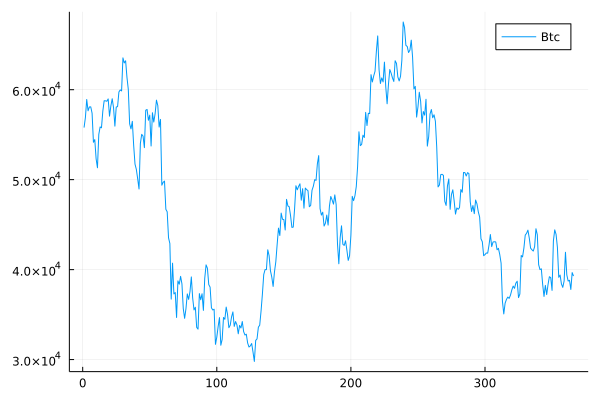

In [1]:
using CSV
using DataFrames
using Plots

#Data del Bitcoin
dataBitcoin = CSV.read("data/Bitcoin3.csv",DataFrame);

#Data del precio del Bitcoin
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

#Para ordenar el data
dataBitcoinOrder = reverse(dataBitcoin.PriceFloat);

#Grafico del precio del bitcoin con los datos recibidos
plot(dataBitcoinOrder, label="Btc")

Con los datos del precio del Bitcoin ya tomados, lo siguiente que se hizo fue realizar diferentes modelos no lineales (polinómicos) para luego observar cual se adapta mas a los datos reales y que tan bien puede predecir el precio luego de una semana.


Entonces primero realizamos los modelos (tomando x como el parametro de los días):

(Modelo 1) $1 + x + x^2 + x^3$

In [2]:
#Numero de días totales
N = size(dataBitcoinOrder,1);
Dias = Array((1:N));
b = Array(dataBitcoinOrder);

#Modelo no lineal planteado
A1 = [ones(N,1) Dias Dias.^2 Dias.^3];

(Modelo 2) $1 + x + x^2 + x^3 + x^4$

In [3]:
#Numero de días totales
N = size(dataBitcoinOrder,1);
Dias = Array((1:N));
b = Array(dataBitcoinOrder);

#Modelo no lineal planteado
A2 = [ones(N,1) Dias Dias.^2 Dias.^3 Dias.^4];

(Modelo 3) $1 + x + x^2 + x^3 + x^4 + x^5$

In [4]:
N = size(dataBitcoinOrder,1);
#Numero de días totales
Dias = Array((1:N));
b = Array(dataBitcoinOrder);

#Modelo no lineal planteado
A3 = [ones(N,1) Dias Dias.^2 Dias.^3 Dias.^4 Dias.^5];

Luego se utiliza factorizacion QR para solucionar el modelo de mínimos cuadrados.

In [5]:
#Modelo 1
xhat = A1\b
println(xhat)
pred1 = xhat[4]*A1[:,4] + xhat[3]*A1[:,3]+ xhat[2]*A1[:,2] + xhat[1]*ones(N,1);

#Modelo 2
xhat2 = A2\b
println(xhat2)
pred2 = xhat2[5]*A2[:,5] + xhat2[4]*A2[:,4] + xhat2[3]*A2[:,3]+ xhat2[2]*A2[:,2] + xhat2[1]*ones(N,1);

#Modelo 3
xhat3 = A3\b
println(xhat3)
pred3 = xhat3[6]*A3[:,6] + xhat3[5]*A3[:,5] + xhat3[4]*A3[:,4] + xhat3[3]*A3[:,3]+ xhat3[2]*A3[:,2] + xhat3[1]*ones(N,1);


[66595.69292358613, -582.0781943689269, 3.885568114231771, -0.0070588207463090635]
[71974.27098861824, -871.6345805553802, 7.424695595496112, -0.022045989697560563, 2.041848630960687e-5]
[56362.87627153069, 380.57456682506404, -16.329192739125464, 0.15019802285514156, -0.0005072151034834788, 5.750774820633082e-7]


Luego se realiza un plot de cada modelo para observar que tan bien se adecua a los datos reales

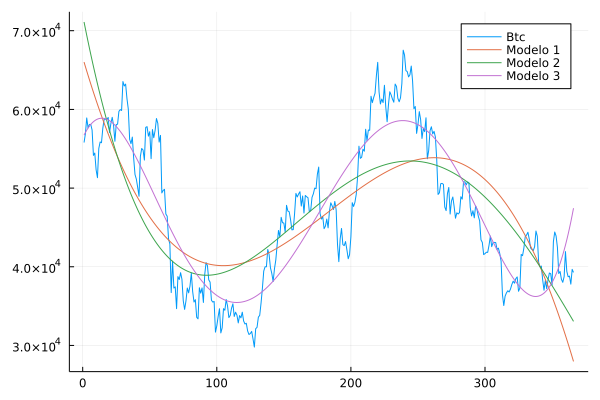

In [6]:
using Plots

#Se realiza un plot de los modelos comparandolos con el plot de los valores reales
plot(Dias,b, label="Btc")
plot!(Dias,pred1, label="Modelo 1")
plot!(Dias,pred2, label="Modelo 2")
plot!(Dias,pred3, label="Modelo 3")

Ahora intentemos realizar una prediccion de los siguientes 7 días del precio del bitcoin (16/03/2022 - 22/03/2022) con los 3 modelos planteados y luego comparemoslos

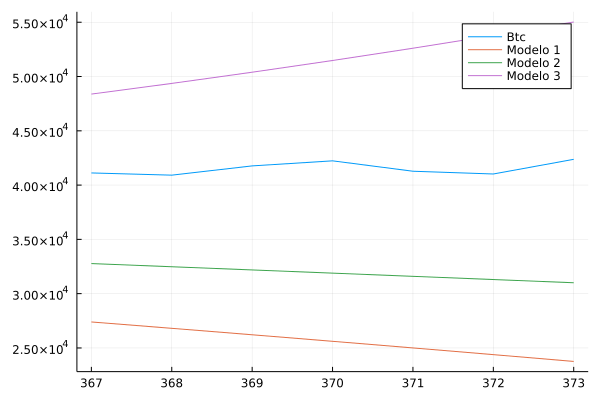

In [7]:
#Prediccion de los siguientes 7 dias

#Valores reales:
dataBtcActual = CSV.read("data/PredSemana.csv",DataFrame);

#Data del precio actual del Bitcoin
dataBtcActual.Price .= replace.(dataBtcActual.Price, "," => "");
ActualBTC = parse.(Float64, dataBtcActual.Price);

ActualBTC = reverse(ActualBTC);

#Siguientes 7 dias
DiasPred = Array((N+1:N+7));

A1 = [ones(7,1) DiasPred DiasPred.^2 DiasPred.^3];
A2 = [ones(7,1) DiasPred DiasPred.^2 DiasPred.^3 DiasPred.^4];
A3 = [ones(7,1) DiasPred DiasPred.^2 DiasPred.^3 DiasPred.^4 DiasPred.^5];

BTCpred1 = xhat[4]*A1[:,4] + xhat[3]*A1[:,3]+ xhat[2]*A1[:,2] + xhat[1]*ones(7,1);

BTCpred2 = xhat2[5]*A2[:,5] + xhat2[4]*A2[:,4] + xhat2[3]*A2[:,3]+ xhat2[2]*A2[:,2] + xhat2[1]*ones(7,1);

BTCpred3 = xhat3[6]*A3[:,6] + xhat3[5]*A3[:,5] + xhat3[4]*A3[:,4] + xhat3[3]*A3[:,3]+ xhat3[2]*A3[:,2] + xhat3[1]*ones(7,1);



plot(DiasPred, ActualBTC, label="Btc")
plot!(DiasPred, BTCpred1, label="Modelo 1")
plot!(DiasPred, BTCpred2, label="Modelo 2")
plot!(DiasPred, BTCpred3, label="Modelo 3")

Con esta gráfica podemos ver que claramente ninguno de los modelos planteados va a poder realizar una predicción acertada (ni cercana) del precio futuro del bitcoin.

Si igualmente calculamos el error promedio de cada modelo vamos a tener que:



In [8]:
#Promedio entre la diferencia de las predicciones y los valores reales
Error1 = abs.(ActualBTC - BTCpred1);
promedio1 = sum(Error1)/7;
println("El error promedio del modelo 1 es: ", promedio1);

Error2 = abs.(ActualBTC - BTCpred2);
promedio2 = sum(Error2)/7;
println("El error promedio del modelo 2 es: ", promedio2);

Error3 = abs.(ActualBTC - BTCpred3);
promedio3 = sum(Error3)/7;
println("El error promedio del modelo 3 es: ", promedio3);


El error promedio del modelo 1 es: 15934.538880465643
El error promedio del modelo 2 es: 9640.332171966073
El error promedio del modelo 3 es: 10047.51439167876


Reafirmando lo anterior las diferencias promedio entre los modelos y el valor real del bitcoin son muy altas, por lo tanto ninguno de los modelos muestra una predicción acertada.

**(Navegacion entre los ejercicios)**

Link al [Ejercicio 3](Tarea1Ejercicio3.ipynb)

Regresar a [Introducción_Tarea1.ipynb](Introducción_Tarea1.ipynb)

---

**Autor:** Alejandro Martin Salcedo

---